In [1]:
import sys
sys.path.append('../Module')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from loader_csv import charger_csv



# Spécifiez les chemins des quatre parties du CSV découpé
partie1 = "../Dataset/SBAnational_part_part1.csv"
partie2 = "../Dataset/SBAnational_part_part2.csv"
partie3 = "../Dataset/SBAnational_part_part3.csv"
partie4 = "../Dataset/SBAnational_part_part4.csv"

# Utilisez la fonction charger_csv pour obtenir un DataFrame avec toutes les données réassemblées
SBA = charger_csv(partie1, partie2, partie3, partie4)

/tmp/ipykernel_41201/558710212.py:22: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  SBA = charger_csv(partie1, partie2, partie3, partie4)


Dataset: SBA Loan Dataset | Source: Kaggle

The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

In this final project, I will build a Flask-based web app that can recommend whether the loan is approved or not based on the given term and loan condition.


In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
SBA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
len(SBA)

899164

With the given dataset, we have around 899164 rows of SBA Loan historical data.

Columns

    LoanNr_ChkDgt : Identifier
    Name : Borrower Name
    City : Borrower City
    State : Borrower State
    Zip : Borrower Zip Code
    Bank : Bank Name
    BankState : Bank State
    NAICS : North American industry classification system code.
    ApprovalDate : Date SBA commitment issued
    ApprovalFY : Fiscal year of commitment
    Term : Loan term in months
    NoEmp : Number of Business Employees
    NewExist : 1 = Existing business, 2 = New business
    CreateJob : Number of Jobs Created
    RetainedJob : Number of jobs retained
    FranchiseCode : Franchise code, (00000 or 00001) = No franchise
    UrbanRural : 1 = Urban, 2 = rural, 0 = undefined
    RevLineCr : Revolving line of credit: Y = Yes, N = No
    LowDoc : LowDoc Loan Program: Y = Yes, N = No
    ChgOffDate : The date when a loan is declared to be in default
    DisbursementDate : Disbursement date
    DisbursementGross : Amount disbursed
    BalanceGross : Gross amount outstanding
    MIS_Status : Loan status charged off = CHGOFF, Paid in full = PIF
    ChgOffPrinGr : Charged-off amount
    GrAppv : Gross amount of loan approved by bank
    SBA_Appv : SBA's guaranteed amount of approved loa


Exploratory Data Analysis

The first step of this project is to identify the dataset and its feature through exploratory data analysis (EDA). In this step we will analyze the type and condition from all feature from Small Business Administration Dataset.


In [5]:
SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [6]:
SBA.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [7]:
list_item = []
for col in SBA.columns:
    list_item.append([col, SBA[col].dtype, SBA[col].isna().sum(), round((SBA[col].isna().sum()/len(SBA[col]))*100,2),
                      SBA[col].nunique(), list(SBA[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [8]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,LoanNr_ChkDgt,int64,0,0.00,899164,"[4977983002, 2053774006, 4964114007, 116258500..."
1,Name,object,14,0.00,779583,"[RING OF FIRE RESTAURANT/CATERI, CONEYBEARE, I..."
2,City,object,30,0.00,32581,"[ATLANTA, NEW ORLEANS, MILLERTON, BRIDGEWATER ..."
3,State,object,14,0.00,51,"[IA, MN, ND, MO, NE]"
4,Zip,int64,0,0.00,33611,"[38930, 21740, 94103, 16504, 31794]"
5,Bank,object,1559,0.17,5802,"[JPMORGAN CHASE BANK NATL ASSOC, BANK OF UTAH,..."
6,BankState,object,1566,0.17,56,"[DC, LA, OH, VA, IL]"
7,NAICS,int64,0,0.00,1312,"[561310, 0, 446191]"
8,ApprovalDate,object,0,0.00,9859,"[14-Feb-07, 14-Jan-00, 29-Oct-97, 13-Dec-06, 8..."
9,ApprovalFY,object,0,0.00,71,"[2003, 2004, 2000, 1997]"



1. Feature Selection

After conducting exploratory data analysis, the next step is to do a feature selection by analyzing the correlation between all features and target features.
Target Feature (Y)

The feature that will be labeled as the target is the MIS_Status feature. Where in this feature explains which borrower cannot repay loans.
Train Feature (X)

1. Personal & Institusion Information Feature

From SBA Data Frame we can make a conclusion that there are seven column that give personal and instituion information

    LoanNr_ChkDgt as borrower Identifeir
    Name as Borrower Name
    City as Borrower City
    State as Borrower State
    Zip as Borrower Zip Code
    Bank as Bank Name
    BankState as Bank State
    FranchiseCode as FranchiseCode
    UrbanRural as information about business

This information is used only to identify the borrower and the Bank. With that reason we not use this feature for future modeling.

2. NAICS (North American industry classification system code)

NAICS is a classification system of several types of industries registered in America. The first two digits of NAICS explained the type of business industries.

NAICS itself has the potential for decision making. The type of industry will affect the company's performance in business. So that this feature will be used later in the model.

3. Date and Time Feature

It's dataset contained some feature that explains the date of commitment and disbursement.

    ApprovalDate : Date SBA commitment issued
    ApprovalFY : Fiscal year of commitment
    ChgOffDate : The date when a loan is declared to be in default
    DisbursementDate : Disbursement date

Because the model will be deployed following the operating time of the Bank, this feature is used only for additional information and not for modeling.

4. Term

The term provides information on how long the loan will take. Concerning the rules of risk management, the longer the duration, the greater the uncertainty that will lead to risk. So this feature will be used as a reference for modeling.

5. Jobs Columns

This feature explains how many employees are in the related business and how many jobs were created and existed before.

In this dataset there are three features: NoEmp, CreateJob dan RetainedJob


In [9]:
def outliers(DataFrame,Series):
    iqr = Series.quantile(.75) - Series.quantile(.25)
    lower_bound = Series.quantile(.25) - (1.5*iqr)
    upper_bound = Series.quantile(.75) + (1.5*iqr)
    return DataFrame[(Series >= upper_bound) | (Series <= lower_bound)]


In [10]:
# Persentasi Outliers NoEmp Feature
print(f'Persentase outliers: {round(len(outliers(SBA,SBA.NoEmp))/len(SBA.NoEmp)*100,2)}%')

Persentase outliers: 11.39%


<AxesSubplot:xlabel='MIS_Status', ylabel='NoEmp'>

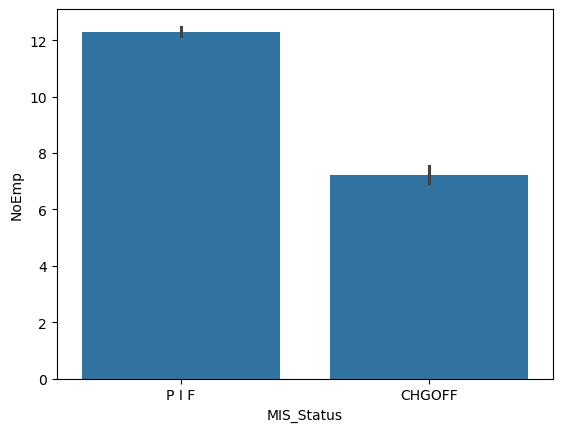

In [11]:
sns.barplot(x=SBA.MIS_Status, y=SBA['NoEmp'])

<AxesSubplot:xlabel='MIS_Status', ylabel='NoEmp'>

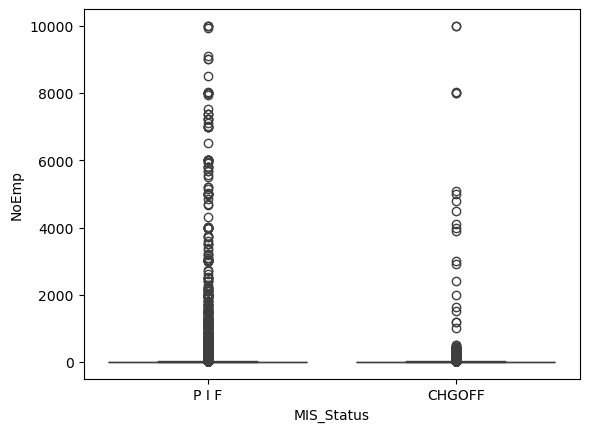

In [12]:
sns.boxplot(x=SBA.MIS_Status, y=SBA['NoEmp'])

<AxesSubplot:xlabel='MIS_Status', ylabel='CreateJob'>

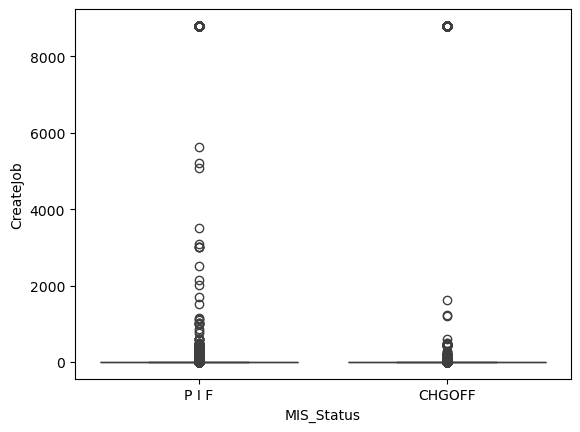

In [13]:
sns.boxplot(x= SBA['MIS_Status'],y=SBA['CreateJob'])

<AxesSubplot:xlabel='MIS_Status', ylabel='CreateJob'>

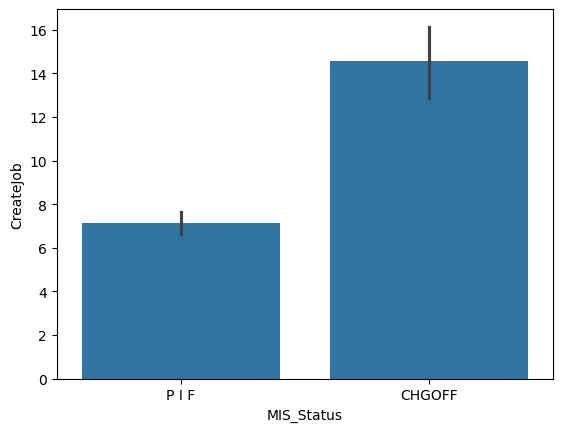

In [14]:
sns.barplot(x=SBA.MIS_Status,y=SBA.CreateJob)

In [15]:
# Persentasi Outliers CreateJob Feature
print(f'Persentase outliers: {round(len(outliers(SBA,SBA.CreateJob))/len(SBA.CreateJob)*100,2)}%')

Persentase outliers: 16.56%


<AxesSubplot:xlabel='MIS_Status', ylabel='RetainedJob'>

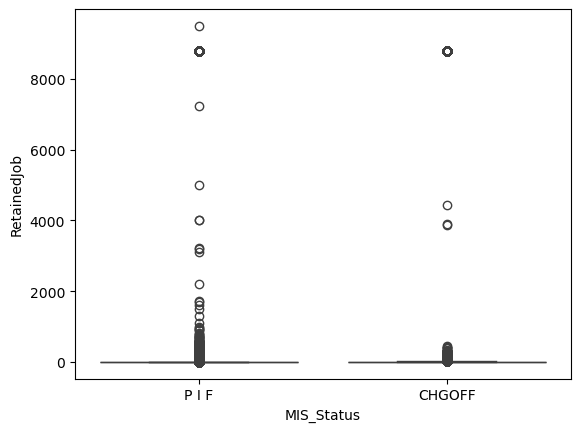

In [16]:
sns.boxplot(x= SBA['MIS_Status'],y=SBA['RetainedJob'])

<AxesSubplot:xlabel='MIS_Status', ylabel='RetainedJob'>

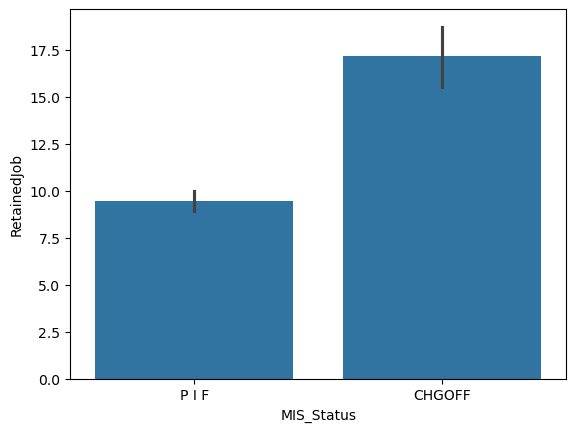

In [17]:
sns.barplot(x=SBA.MIS_Status,y=SBA.RetainedJob)

In [18]:
# Persentasi Outliers RetainedJob Feature
print(f'Persentase outliers: {round(len(outliers(SBA,SBA.RetainedJob))/len(SBA.CreateJob)*100,2)}%')

Persentase outliers: 11.8%




New and existing businesses have different risks in the business condition. We will use this feature to make a decision in modeling.

8. Loan Transaction Type Feature

There are two features for loan transaction:

    RevLineCr : Revolving line of credit which means that if the loan has been paid, the borrower can be able to immediately borrow again.
    LowDoc : LowDoc Loan Program means the borrower can borrow with little administration.

The loan transaction type will affects the level of risk and financial psychology. Then this feature will be used as consideration in the approval model.

11. Amount of Loan

All this five feature explains the amount of loan and its payment balance.

    DisbursementGross : Amount disbursed
    BalanceGross : Gross amount outstanding
    ChgOffPrinGr : Charged-off amount
    GrAppv : Gross amount of loan approved by bank
    SBA_Appv : SBA's guaranteed amount of approved loan

Since DisbursementGross, BalanceGross and ChgOffPrinGr only explain the balance of the loan and not used for loan approval, so the feature can be ignored.


In [19]:
SBA[['MIS_Status','NoEmp','CreateJob','RetainedJob']].corr()

,NoEmp,CreateJob,RetainedJob
NoEmp,1.000000,0.008626,0.015350
CreateJob,0.008626,1.000000,0.993953
RetainedJob,0.015350,0.993953,1.000000


In [20]:
SBA.NewExist.unique()

array([ 2.,  1.,  0., nan])

In [21]:
sns.countplot(SBA.NewExist)

In [ ]:
SBA[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv','SBA_Appv']]

In [ ]:
SBA.head()

In [ ]:
# Drop unused feature
data = SBA.drop(['LoanNr_ChkDgt', 'Name','City', 'State', 'Zip','Bank','BankState','ApprovalDate','ApprovalFY',
                 'NoEmp','CreateJob','RetainedJob','FranchiseCode','UrbanRural', 'ChgOffDate','DisbursementDate','BalanceGross',
                 'DisbursementGross','ChgOffPrinGr'], axis=1)

In [ ]:
data

In [ ]:
data.MIS_Status.value_counts()


2. Data Cleaning
Null and NaN

From the EDA before, we know that there are some NaN and Null data. Since only a few data with NaN and Null condition, we can drop the data with this condition.


In [ ]:
data.info()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()


Categorical Data Cleaning

Some categorical data have an unidentified category. We need to make sure all this category in accordance with the actual condition when the model is running.


In [ ]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100,2),
                      data[col].nunique(), list(data[col].sample(5).drop_duplicates().values)])

dataDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [ ]:
dataDesc

In [ ]:
for x in data[['NewExist', 'RevLineCr','LowDoc','MIS_Status']].columns:
    print(f'{x}: \n{data[x].unique()}\n')



NAICS Feature

We need to make sure all samples have six digits NAICS code, so the data that don't have any NAICS code can be drop.


In [ ]:
data[data['NAICS']==0]

In [ ]:
data.NAICS
NAICSTrue = 0
NAICSFalse = 0
for i in data.NAICS.astype(str):
    if len(i) == 6:
        NAICSTrue += 1
    else:
        NAICSFalse += 1
print(NAICSTrue)
print(NAICSFalse)

In [ ]:
data = data[data.NAICS != 0]



NewExist Feature

We can only classify business with new and existing business. Others data with different code can be ignored


In [ ]:
# NewExist
# 1 = Existing Business
# 2 = New Business
data.NewExist.value_counts()

In [ ]:
data = data[(data.NewExist == 1.0) | (data.NewExist == 2.0)]
data.NewExist.value_counts()



RevLineCr Feature

Since there are only two condition for the revolving credit line, other data must be drop from dataset.


In [ ]:
# Revolving line of credit (RevLineCr)
# Y = Yes
# N = No
data.RevLineCr.value_counts()

In [ ]:
data = data[(data.RevLineCr == 'Y') | (data.RevLineCr == 'N')]
data.RevLineCr.value_counts()



LowDoc Feature

Since there are only two condition for the LowDoc condition, other data must be drop from dataset.


In [ ]:
# LowDoc Loan Program
# Y = Yes
# N = No
data.LowDoc.value_counts()

In [ ]:
data = data[(data.LowDoc == 'Y') | (data.LowDoc == 'N')]
data.LowDoc.value_counts()


Data Type Standardization

Some of the data came with string type for numerical feature. We need to standardize all this condition to make sure the model read the feature as numerical data.

Currency Cleaning


In [ ]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x

In [ ]:
data['GrAppv'] = data['GrAppv'].apply(currencyCleaning).astype(float).astype(int)
data['SBA_Appv'] = data['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)


3. Feature Engineering

Because machine learning algorithm use numerical data for considering the model. We need to do feature engineeing to modifiy the feature for modeling.

NAICS

    11 : Agriculture, forestry, fishing and hunting
    21 : Mining, quarrying, and oil and gas extraction
    22 : Utilities
    23 : Construction
    31-33 : Manufacturing
    42 : Wholesale trade
    44-45 : Retail trade
    48-49 : Transportation and warehousing
    51 : Information
    52 : Finance and insurance
    53 : Real estate and rental and leasing
    54 : Professional, scientific, and technical services
    55 : Management of companies and enterprises
    56 : Administrative/support & waste management/remediation Service
    61 : Educational services
    62 : Health care and social assistance
    71 : Arts, entertainment, and recreation
    72 : Accommodation and food services
    81 : Other services (except public administration)
    92 : Public administration



In [ ]:
# Join NAICS with similar industry
def naicsEngineering(x):
    x = str(x)
    x = x[:2]
    if (x == '31') | (x == '32') | (x == '33'):
        x = '31-33'
    elif (x == '44') | (x == '45'):
        x = '44-45'
    elif (x == '48') | (x == '49'):
        x = '48-49'
    return x

In [ ]:
data.NAICS = data.NAICS.apply(naicsEngineering)

In [ ]:
(data)

In [ ]:
# get dummy
NAICS = pd.get_dummies(data['NAICS'], prefix='NAICS', drop_first=False)
RevLineCr = pd.get_dummies(data['RevLineCr'], drop_first=True)
LowDoc = pd.get_dummies(data['LowDoc'], drop_first=True)
MIS_Status = pd.get_dummies(data['MIS_Status'], drop_first=True)

In [ ]:
data.drop(['NAICS', 'RevLineCr', 'LowDoc', 'MIS_Status'], axis=1, inplace=True)

In [ ]:
data['RevLineCr'] = RevLineCr['Y']
data['LowDoc'] = LowDoc['Y']
data = pd.concat([data,NAICS,MIS_Status], axis=1)

In [ ]:
data = data.rename(columns={'P I F':'Approve'})
data


4. Export CSV file

The last step of this stage is to save the cleaned data into CSV format. So it can be used for a later stage

In [ ]:
# def build_feature_importance(model, X_train, y_train):
    
#     models = RandomForestClassifier(criterion='entropy', random_state=11, oob_score=True, n_jobs=-1, \
#                            max_depth=25, min_samples_leaf=80, min_samples_split=3, n_estimators=70)
#     models.fit(X_train, y_train)
#     data = pd.DataFrame(models.feature_importances_, X_train.columns, columns=["feature"])
#     data = data.sort_values(by='feature', ascending=False).reset_index()
#     plt.figure(figsize=[6,6])
#     sns.barplot(x='index', y='feature', data=data[:10], palette="Blues_d")
#     plt.title('Feature inportance of Random Forest after Grid Search')
#     plt.xticks(rotation=45)
#     plt.show();
    
# build_feature_importance(RandomForestClassifier, X_train, y_train)
